In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set()

In [2]:
dataset =  pd.read_csv('Data_Train.csv')

In [3]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dataset.dropna(inplace = True)

In [5]:
dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Outcomes

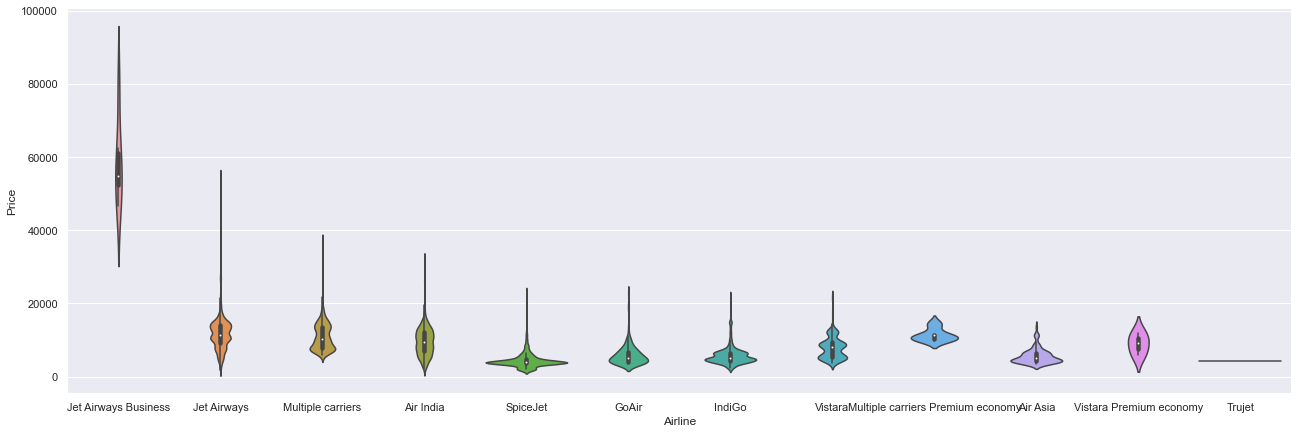

In [6]:
sns.catplot(y = "Price", x = "Airline", data = dataset.sort_values("Price", ascending = False), kind="violin", height = 6, aspect = 3)
plt.show()

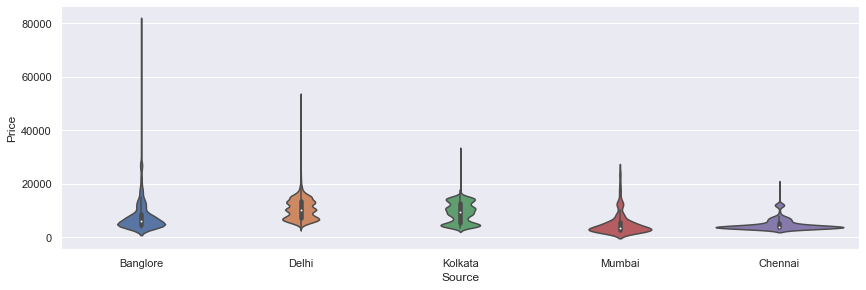

In [7]:
sns.catplot(y = "Price", x = "Source", data = dataset.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

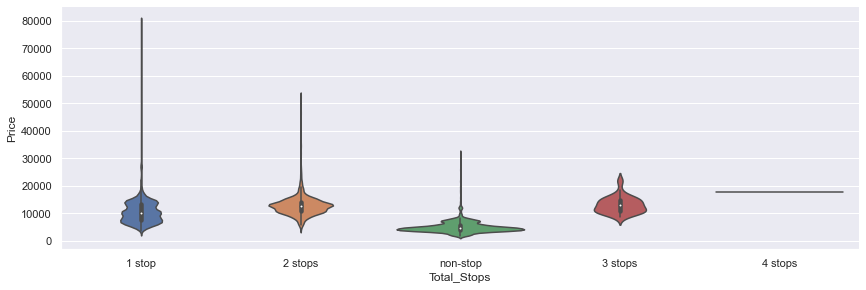

In [8]:
sns.catplot(y = "Price", x = "Total_Stops", data = dataset.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

In [9]:
dataset["Dep_date"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
dataset["Dep_month"] = pd.to_datetime(dataset.Date_of_Journey, format="%d/%m/%Y").dt.month

In [11]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_date,Dep_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
dataset.drop(["Date_of_Journey","Route", "Additional_Info"], axis = 1, inplace = True)

In [13]:
dataset["Total_Stops"].value_counts()
dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [14]:
dataset["Dep_hour"] = pd.to_datetime(dataset["Dep_Time"]).dt.hour
dataset["Dep_min"] = pd.to_datetime(dataset["Dep_Time"]).dt.minute

dataset["Arrival_hour"] = pd.to_datetime(dataset.Arrival_Time).dt.hour
dataset["Arrival_min"] = pd.to_datetime(dataset.Arrival_Time).dt.minute

dataset.drop(["Dep_Time","Arrival_Time"], axis = 1, inplace = True)

In [15]:
dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Dep_date,Dep_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35


In [16]:
duration = list(dataset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [17]:
dataset["Duration_hours"] = duration_hours
dataset["Duration_mins"] = duration_mins
dataset.drop(["Duration"], axis = 1, inplace = True)
dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_date,Dep_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [18]:
Airline = dataset[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [19]:
Source = dataset[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Destination = dataset[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)


In [20]:
train_data = pd.concat([dataset, Airline, Source, Destination], axis = 1)

In [21]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_date,Dep_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [22]:
train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
train_data.head()

,Total_Stops,Price,Dep_date,Dep_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [23]:
dataset_test = pd.read_csv('Test_set.csv')

In [24]:
dataset_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [25]:
print("Test data Info")
print("-"*75)
print(dataset_test.info())

print()
print()

print("Null values :")
print("-"*75)
dataset_test.dropna(inplace = True)
print(dataset_test.isnull().sum())


dataset_test["Dep_date"] = pd.to_datetime(dataset_test["Date_of_Journey"], format="%d/%m/%Y").dt.day
dataset_test["Dep_month"] = pd.to_datetime(dataset_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
dataset_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
dataset_test["Dep_hour"] = pd.to_datetime(dataset_test["Dep_Time"]).dt.hour
dataset_test["Dep_min"] = pd.to_datetime(dataset_test["Dep_Time"]).dt.minute
dataset_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
dataset_test["Arrival_hour"] = pd.to_datetime(dataset_test.Arrival_Time).dt.hour
dataset_test["Arrival_min"] = pd.to_datetime(dataset_test.Arrival_Time).dt.minute
dataset_test.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(dataset_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
dataset_test["Duration_hours"] = duration_hours
dataset_test["Duration_mins"] = duration_mins
dataset_test.drop(["Duration"], axis = 1, inplace = True)

print()
print()

print("Airline")
print("-"*75)
print(dataset_test["Airline"].value_counts())
Airline = pd.get_dummies(dataset_test["Airline"], drop_first= True)

print()
print()

print("Source")
print("-"*75)
print(dataset_test["Source"].value_counts())
Source = pd.get_dummies(dataset_test["Source"], drop_first= True)

print()
print()

print("Destination")
print("-"*75)
print(dataset_test["Destination"].value_counts())
Destination = pd.get_dummies(dataset_test["Destination"], drop_first = True)


dataset_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


dataset_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


test_data = pd.concat([dataset_test, Airline, Source, Destination], axis = 1)

test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)



test_data.head()

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

,Total_Stops,Dep_date,Dep_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
train_data.shape

(10682, 30)

In [27]:
train_data.columns

Index(['Total_Stops', 'Price', 'Dep_date', 'Dep_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [28]:
X = train_data.loc[:, ['Total_Stops', 'Dep_date', 'Dep_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Dep_date,Dep_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Feature importance

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)

[2.47792889e-01 1.43155813e-01 5.35054275e-02 2.43497079e-02
 2.11983735e-02 2.78714303e-02 1.92091781e-02 1.05440047e-01
 1.75568553e-02 9.07831056e-03 1.93836021e-03 1.70116174e-02
 1.40238511e-01 6.70820531e-02 2.00728976e-02 8.20130399e-04
 3.12829922e-03 9.27824281e-05 5.21397813e-03 7.67051604e-05
 4.43589411e-04 1.07230858e-02 3.23290953e-03 4.43651103e-03
 9.60518165e-03 1.40882231e-02 7.38002278e-03 4.21873323e-04
 2.48352363e-02]


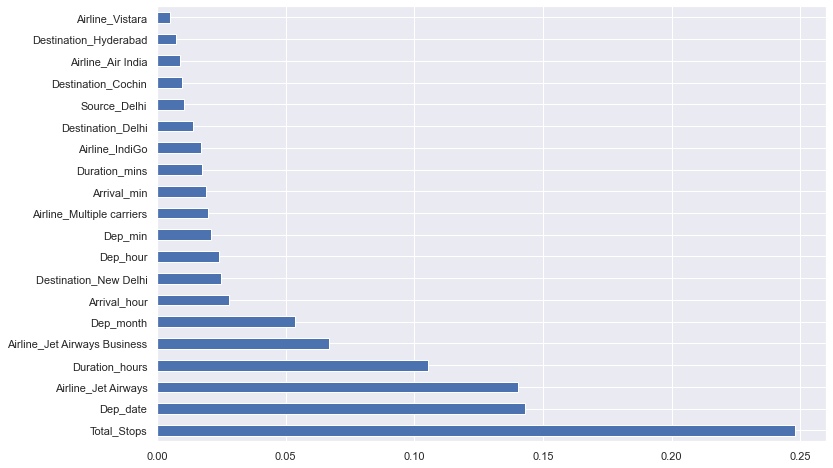

In [31]:
plt.figure(figsize = (12,8))
imp= pd.Series(selection.feature_importances_, index=X.columns)
imp.nlargest(20).plot(kind='barh')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

Model is: RandomForestRegressor()
Training score: 0.9529310211287295
Predictions are: [16871.15        5325.66        8951.18       ...  6618.54
 12797.3075     13149.21616667]


r2 score is: 0.7969459915899594
MAE:1176.2692118364268
MSE:4378261.966184116
RMSE:2092.429680104953


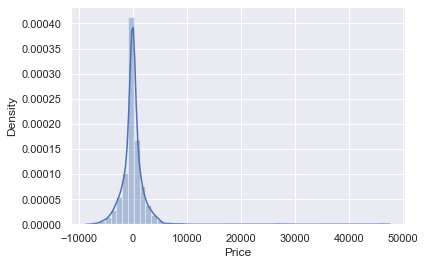

In [33]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      
          

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
reg_rf=RandomForestRegressor()

reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
predict(RandomForestRegressor())

In [34]:
import pickle
file = open('flight_rf.pkl', 'wb')

pickle.dump(reg_rf, file)


In [35]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)


In [36]:
y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

0.7980040170761739